# KNN

## Importing the libraries

In [1]:
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting (if needed)
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.neighbors import KNeighborsClassifier  # For KNN classification model
from sklearn.metrics import confusion_matrix, accuracy_score  # For evaluating the model
import pandas as pd


## Importing the dataset

In [2]:
iris_data = pd.read_csv("/content/Iris.csv")
# Define the features (independent variables) and the target (dependent variable)
X = iris_data.iloc[:, 1:5].values  # Selecting columns: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
y = iris_data.iloc[:, 5].values  # Selecting the Species column as the target

## Splitting the dataset into the training set and test set

In [3]:
# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [4]:
# Scale the features to standardize them (mean=0, variance=1)
scaler = StandardScaler()  # Initialize the scaler
X_train = scaler.fit_transform(X_train)  # Fit and transform the training set
X_test = scaler.transform(X_test)  # Transform the test set (using the same fit)

## Training the KNN model on training set

In [5]:
# Initialize the KNN model with a specific number of neighbors (k)
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the value of k

# Train the model on the training set
knn_classifier.fit(X_train, y_train)  # The model will learn the relationship between the features and the target


KNeighborsClassifier()

## Predicting the test set results

In [6]:
# Predict the target (Species) for the test set
y_pred = knn_classifier.predict(X_test)  # Make predictions on the test set


## Evaluating the model

In [7]:
# Create a confusion matrix to evaluate the performance of the model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)  # Print the confusion matrix

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model: {accuracy * 100:.2f}%")  # Print the accuracy of the model


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy of KNN model: 100.00%


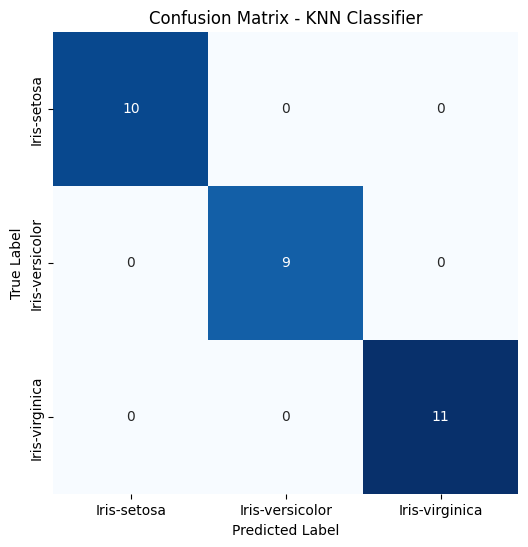

In [8]:
# Importing the required library for confusion matrix visualization
import seaborn as sns

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

# Adding labels and title
plt.title('Confusion Matrix - KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
